# Commodity Price Forecasting Using Multi-Market Financial Time Series Data  

## Problem Statement  
Global commodity markets are influenced by multiple, interconnected factors including stock indices, futures contracts, and foreign exchange rates. Predicting commodity returns is particularly challenging due to market volatility, time-lagged effects, and dependencies across different financial instruments. Without reliable forecasts, traders, investors, and organizations may struggle to manage risks and optimize trading strategies effectively.

This project leverages historical data from multiple markets—including the London Metal Exchange (LME), Japan Exchange Group (JPX), and U.S. stock markets—to develop predictive models for commodity returns and spreads. By incorporating lagged features, the project captures the influence of past market movements on future commodity prices, enabling more informed and timely predictions.

#### Success of the project will be evaluated using metrics such as:

Mean Absolute Error (MAE): Average magnitude of prediction errors.

Root Mean Squared Error (RMSE): Measures error magnitude with greater penalty for larger deviations.

R-squared (R²): Proportion of variance explained by the model.

Directional Accuracy: Percentage of correct predictions in the direction of price movement.

## Objectives  
1. To preprocess and integrate multi-market financial time series data for commodities.  
2. To explore and analyze patterns, correlations, and volatility in commodity returns.  
3. To develop predictive models for selected commodity prices and spreads.  
4. To evaluate model accuracy and stability using appropriate performance metrics.  
5. To generate insights that can support trading strategies and risk management.  

In [416]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")


### Loading the Training Labels

We load the file train_labels.csv that our model will try to learn and predict.  

In [417]:
df_train_labels = pd.read_csv(r'Data\train_labels.csv')
df_train_labels

,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,0.005948,-0.002851,-0.004675,-0.000639,NaN,NaN,-0.006729,0.006066,NaN,...,NaN,0.021239,-0.005595,NaN,-0.004628,0.033793,NaN,0.038234,NaN,0.027310
1,1,0.005783,-0.024118,-0.007052,-0.018955,-0.031852,-0.019452,0.003002,-0.006876,-0.002042,...,0.003377,0.021372,-0.001517,0.012846,0.010547,0.030527,-0.000764,0.025021,0.003548,0.020940
2,2,0.001048,0.023836,-0.008934,-0.022060,NaN,NaN,0.037449,0.007658,NaN,...,-0.006712,0.009308,0.001857,-0.012761,-0.002345,0.017529,-0.005394,0.004835,-0.009075,0.001706
3,3,0.001700,-0.024618,0.011943,0.004778,NaN,NaN,-0.012519,-0.016896,NaN,...,NaN,0.036880,-0.015189,NaN,0.008118,0.001079,NaN,-0.015102,NaN,-0.033010
4,4,-0.003272,0.005234,0.006856,0.013312,0.023953,0.010681,-0.011649,0.002019,0.003897,...,NaN,0.004937,NaN,-0.006673,-0.016105,-0.004885,NaN,NaN,0.009514,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,0.002761,-0.004500,-0.001530,-0.003022,NaN,NaN,-0.006263,0.001251,NaN,...,NaN,0.010110,0.009248,NaN,0.009526,0.004318,NaN,0.005344,NaN,-0.041391
1957,1957,0.011424,-0.001036,0.000409,-0.003524,-0.008052,-0.013435,0.013214,-0.008121,0.005308,...,-0.006012,-0.007567,0.021569,0.008000,0.015748,-0.001036,0.001043,0.015982,0.004550,-0.028627
1958,1958,-0.002654,-0.002032,0.001083,0.004975,0.016810,0.020511,-0.003176,-0.002232,0.012985,...,-0.026047,-0.007783,0.005746,-0.020410,0.026720,0.007130,0.004826,-0.002617,-0.033630,-0.007604
1959,1959,0.002124,-0.006335,-0.003885,0.002704,-0.004042,-0.001637,0.000142,-0.010872,-0.002934,...,-0.006359,-0.006478,0.012228,0.013633,0.022029,0.000092,0.016932,-0.000136,-0.006557,0.009290


- Each row represents one trading day identified by `date_id`.  
- Each column (`target_0` … `target_423`) represents a **log return** for a specific financial instrument or a spread between two instruments.  
- These are the values the model will use as **labels** during  learning. 

## Data Inspection

###  Inspecting `train_labels.csv`

To understand the basic structure and characteristics of our dataset.  
We will start by inspecting its shape, column information, and summary statistics.

In [418]:
# Checking the shape of the df_train_labels
print("Shape of dataset:", df_train_labels.shape)

# Check data types and missing values
print("\nInfo:")
print(df_train_labels.info())

# Summary statistics
print("\nSummary statistics:")
print(df_train_labels.describe().T) 


Shape of dataset: (1961, 425)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Columns: 425 entries, date_id to target_423
dtypes: float64(424), int64(1)
memory usage: 6.4 MB
None

Summary statistics:
             count        mean         std       min         25%         50%  \
date_id     1961.0  980.000000  566.236258  0.000000  490.000000  980.000000   
target_0    1827.0    0.000470    0.011925 -0.123763   -0.004567    0.000928   
target_1    1784.0   -0.000575    0.016930 -0.120442   -0.010452   -0.000954   
target_2    1875.0    0.000215    0.013071 -0.067288   -0.007658    0.000318   
target_3    1875.0    0.000198    0.014901 -0.072471   -0.008839    0.000216   
...            ...         ...         ...       ...         ...         ...   
target_419  1859.0   -0.000818    0.025905 -0.148810   -0.015311    0.000082   
target_420  1617.0    0.001186    0.028414 -0.129016   -0.014564    0.000642   
target_421  1768.0    0.001295    0.032321 -0.1

### Dataset Shape
The dataset contains **1961 rows** and **425 columns**.  
- The `date_id` column represents the time index.  

### Dataset Info
The dataset consists of:  
- `date_id`: an integer index running from 0 to 1960.  
- 424 `target_*` columns: numerical values (float64), many of which contain missing values (`NaN`).  

### Summary Statistics
- Most `target` values have **means close to 0**.  
- Standard deviations are small (0.01 – 0.05), though some series show higher volatility.  
- Minimum and maximum values confirm fluctuations both above and below zero, consistent with time series return-like behavior.  
- Many targets have fewer than 1961 valid entries which highlighting the presence of missing values.  

### Missing Values Analysis

In [419]:
# Count missing values per column
missing_counts = df_train_labels.isna().sum().sort_values(ascending=False)
print(missing_counts.head(10))  

# Percentage of missing values overall
print("\nTotal missing percentage:", df_train_labels.isna().mean().mean() * 100, "%")


target_404    370
target_82     359
target_290    350
target_247    350
target_252    350
target_232    350
target_288    350
target_269    350
target_286    350
target_256    350
dtype: int64

Total missing percentage: 10.487206407295195 %


### Missing Value Analysis of df_train_labels

- **Total missing percentage**: **10.49%** of the dataset.  
- This indicates that while most values are present, a non-trivial portion of the data is incomplete.

This step counts the number of missing values per column in the dataset df_train_labels.
By sorting in descending order, we can quickly identify which columns are most affected by missing data.

In [420]:
# Count missing values per column
missing_cols = df_train_labels.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].sort_values(ascending=False)
missing_cols


target_404    370
target_82     359
target_317    350
target_290    350
target_303    350
             ... 
target_39      86
target_45      86
target_43      86
target_56      86
target_60      86
Length: 422, dtype: int64

The results show:

**422 columns** contain missing values.

The column with the highest missing count is `target_404` with 370 missing entries.

Other columns such as `target_82`, `target_317`, `target_290`, and `target_303` also have 350 missing values.

On the lower end, some columns like `target_39`, `target_45`, `target_43`, `target_56`, and `target_60` have 86 missing entries.

This confirms that missingness is spread across many columns, with varying severity.

### Missing Value Analysis in Percentage per Column

While counts show the absolute missing values, percentages give a clearer idea of how much data is missing relative to the dataset size. This helps prioritize which columns may need imputation, removal, or special treatment.

In [421]:
# Percentage of missing values per column
missing_percentage = (df_train_labels.isnull().sum() / len(df_train_labels)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_percentage


target_404    18.867925
target_82     18.306986
target_317    17.848037
target_290    17.848037
target_303    17.848037
                ...    
target_39      4.385518
target_45      4.385518
target_43      4.385518
target_56      4.385518
target_60      4.385518
Length: 422, dtype: float64

### Missing Value Analysis in Percentage per Column
The percentage of missing values across columns shows:

- The column with the **highest missing percentage** is **`target_404` with ~18.87% missing values**.  
- Other heavily affected columns include **`target_82` (~18.31%), `target_317`, `target_290`, and `target_303`** —all with 17.85% missing values.  
- On the lower end, some columns such as **`target_39`, `target_45`, `target_43`, `target_56`, and `target_60`** have **4.39% missing values**.  
- In total, **422 columns** have missing data, but the severity varies from **~4% to ~19%**.  

- The missingness is widespread as none exceed 20%. 

###  Inspecting `train.csv`

So far, we have inspected **`train_labels.csv`**, which contains the **target variables** (log returns and spreads).  

We explored:
- The **shape** of the dataset.  
- **Summary statistics** of all columns.  
- The **missing values**, noting that ~10% of the values are missing across 422 target columns.  

At this stage, we decided against dropping or imputing missing values in `train_labels.csv` yet.  
This is because:
1. The labels are only meaningful when aligned with the **input features** from `train.csv`.  
2. Some missing values may naturally correspond to days when certain securities were not traded, which will become clearer after inspecting the features dataset.  
3. Premature cleaning could cause us to drop valuable rows or columns that might still be usable after merging datasets.  

We now proceed to inspect **`train.csv`**,   
This inspection will include:
- Dataset **shape** and structure.  
- Column data types and non-null counts.  
- Summary statistics.  
- Missing values analysis.  

By comparing both `train.csv` and `train_labels.csv`, we will later decide:  
- How to properly merge them.  
- How to handle missing values across both datasets consistently.  
- Which features will be most useful for predicting the targets.  

In [422]:
df_train = pd.read_csv(r'Data\train.csv')
df_train

,date_id,LME_AH_Close,LME_CA_Close,LME_PB_Close,LME_ZS_Close,JPX_Gold_Mini_Futures_Open,JPX_Gold_Rolling-Spot_Futures_Open,JPX_Gold_Standard_Futures_Open,JPX_Platinum_Mini_Futures_Open,JPX_Platinum_Standard_Futures_Open,...,FX_GBPCAD,FX_CADCHF,FX_NZDCAD,FX_NZDCHF,FX_ZAREUR,FX_NOKGBP,FX_NOKCHF,FX_ZARCHF,FX_NOKJPY,FX_ZARGBP
0,0,2264.5,7205.0,2570.0,3349.0,NaN,NaN,NaN,NaN,NaN,...,1.699987,0.776874,0.888115,0.689954,0.066653,0.090582,0.119630,0.078135,13.822740,0.059163
1,1,2228.0,7147.0,2579.0,3327.0,NaN,NaN,NaN,NaN,NaN,...,1.695279,0.778682,0.889488,0.692628,0.067354,0.091297,0.120520,0.079066,13.888146,0.059895
2,2,2250.0,7188.5,2587.0,3362.0,4684.0,4691.0,4684.0,3363.0,3367.0,...,1.692724,0.780186,0.894004,0.697490,0.067394,0.091478,0.120809,0.079287,13.983675,0.060037
3,3,2202.5,7121.0,2540.0,3354.0,4728.0,4737.0,4729.0,3430.0,3426.0,...,1.683111,0.785329,0.889439,0.698502,0.067639,0.091558,0.121021,0.079285,14.035571,0.059983
4,4,2175.0,7125.0,2604.0,3386.0,NaN,NaN,NaN,NaN,NaN,...,1.684816,0.787264,0.891042,0.701485,0.067443,0.091266,0.121055,0.078925,14.013760,0.059503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,1956,2629.5,9778.5,2010.0,2818.5,16041.0,16183.0,16046.0,6076.0,6073.0,...,1.842075,0.584336,0.819066,0.478610,0.048581,0.073181,0.078771,0.045312,14.606239,0.042097
1957,1957,2646.5,9860.0,2014.5,2838.5,NaN,NaN,NaN,NaN,NaN,...,1.844791,0.583610,0.816264,0.476380,0.048547,0.072941,0.078532,0.045315,14.502889,0.042089
1958,1958,2658.5,9919.5,2011.0,2860.0,16132.5,16261.0,16134.0,6200.0,6200.0,...,1.839538,0.583402,0.816093,0.476110,0.048495,0.073421,0.078794,0.045184,14.580416,0.042103
1959,1959,2651.0,9930.5,2032.0,2862.0,16214.5,16341.0,16211.0,6175.0,6195.0,...,1.847106,0.582341,0.822465,0.478955,0.048457,0.072909,0.078424,0.045193,14.492839,0.042015


### Loading of `train.csv`

After loading the `train.csv`, we observe that:

- **Shape of dataset**: `1961 rows × 558 columns`.  

- **Missing values**:  
  - From the preview, certain instruments `JPX_Gold_Mini_Futures_Open` contain `NaN` for some dates.  

### Initial Inspection of df_train 

This step will help us:

- Understand the shape of df_train.
- Identify numerical columns and their distributions.
- Detect potential missing values .

In [423]:
### Inspecting df_train

# Shape
print("Shape of dataset:", df_train.shape)

# Info
print("\nInfo:")
print(df_train.info())

# Summary statistics
print("\nSummary statistics:")
print(df_train.describe())


Shape of dataset: (1961, 558)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Columns: 558 entries, date_id to FX_ZARGBP
dtypes: float64(557), int64(1)
memory usage: 8.3 MB
None

Summary statistics:
           date_id  LME_AH_Close  LME_CA_Close  LME_PB_Close  LME_ZS_Close  \
count  1961.000000   1910.000000   1910.000000   1910.000000   1910.000000   
mean    980.000000   2252.202853   7928.229026   2085.848576   2795.022628   
std     566.236258    398.544566   1523.186335    183.154551    445.009643   
min       0.000000   1462.000000   4630.000000   1585.500000   1815.500000   
25%     490.000000   1925.250000   6396.125000   1973.000000   2479.500000   
50%     980.000000   2245.500000   8260.750000   2070.750000   2771.000000   
75%    1470.000000   2512.000000   9323.375000   2188.000000   3031.000000   
max    1960.000000   3849.000000  10889.000000   2681.000000   4498.500000   

       JPX_Gold_Mini_Futures_Open  JPX_Gold_Rolling-Spot_Futures_

### Summary of df_train Inspection

- The dataset has **1961 rows × 558 columns**, representing 558 features for each date_id.
- All columns except `date_id` are numerical.
- Statistical summary shows a wide range of values across features, which may require scaling or normalization in later preprocessing.

### Missing Value Analysis of df_train

To understand the missing data in df_train we check for missing values per column in order for it.  

Allow us to:

- Identify features with missing entries.
- Determine if any columns require imputation or removal.
- Compare missingness patterns with the train_labels.csv.

In [424]:
# Count missing values per column
missing_train = df_train.isnull().sum()
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

# Display top 10 columns with most missing values
missing_train.head(10)


US_Stock_GOLD_adj_high                1713
US_Stock_GOLD_adj_open                1713
US_Stock_GOLD_adj_volume              1713
US_Stock_GOLD_adj_low                 1713
US_Stock_GOLD_adj_close               1713
JPX_Gold_Rolling-Spot_Futures_Open     116
JPX_Gold_Standard_Futures_Open         116
JPX_Platinum_Mini_Futures_Open         116
JPX_RSS3_Rubber_Futures_High           116
JPX_RSS3_Rubber_Futures_Open           116
dtype: int64

### Summary of Missing Values in df_train

- The `df_train` contains **558 columns** in total. 

- The missingness is more severe in US stock gold-related columns.  
- The other commodity features have fewer missing values.  

This analysis helps us prioritize which columns may need imputation or further investigation before merging with the target dataset.


In [425]:
# Percentage of missing values per column for df_train
missing_percentage_train = (df_train.isnull().sum() / len(df_train)) * 100
missing_percentage_train = missing_percentage_train[missing_percentage_train > 0].sort_values(ascending=False)
missing_percentage_train


US_Stock_GOLD_adj_high      87.353391
US_Stock_GOLD_adj_open      87.353391
US_Stock_GOLD_adj_volume    87.353391
US_Stock_GOLD_adj_low       87.353391
US_Stock_GOLD_adj_close     87.353391
                              ...    
US_Stock_YINN_adj_volume     3.416624
LME_ZS_Close                 2.600714
LME_PB_Close                 2.600714
LME_CA_Close                 2.600714
LME_AH_Close                 2.600714
Length: 519, dtype: float64

### Missing Value Analysis of df_train

- **Total columns with missing values**: 519 out of 558 columns.  

- The columns with the highest missing percentage are related to US Stock data, `US_Stock_GOLD_adj_high`, `US_Stock_GOLD_adj_open`, `US_Stock_GOLD_adj_volume`, `US_Stock_GOLD_adj_low`, and `US_Stock_GOLD_adj_close`, each with **87.35% missing values**.  
- Other columns, mainly LME and some commodity prices like `LME_ZS_Close`, `LME_PB_Close`, `LME_CA_Close`, and `LME_AH_Close`, have smaller but still significant missing values, around **2.6%**. 

- Missingness in this dataset is widespread, affecting both stock/commodity prices and futures data. Some columns are almost entirely missing especially certain US stock features, while others have minor gaps.  

This confirms that a **systematic approach to handle missing data** will be required before any analysis or modeling.


### Inspecting `target_pairs.csv`

The `target_pairs.csv` file shows how each target variable is linked to its corresponding features.  

Unlike the other two datasets, this one is mostly categorical, so instead we will be looking at completeness and consistency.  
  
- Making sure every target from `df_train_labels` is included in the mapping.  
- Verifying that all features mentioned in the mapping actually exist in `df_train`.  
- Spotting any missing or unmatched pairs that could cause problems later during merging or feature engineering.  

By carefully inspecting this mapping, we make sure that when we eventually **merge datasets or fill in missing values**, the relationships between targets and features are clear and accurate.

In [426]:
df_pairs = pd.read_csv(r'Data\target_pairs.csv')
df_pairs

,target,lag,pair
0,target_0,1,US_Stock_VT_adj_close
1,target_1,1,LME_PB_Close - US_Stock_VT_adj_close
2,target_2,1,LME_CA_Close - LME_ZS_Close
3,target_3,1,LME_AH_Close - LME_ZS_Close
4,target_4,1,LME_AH_Close - JPX_Gold_Standard_Futures_Close
...,...,...,...
419,target_419,4,FX_NOKUSD - LME_AH_Close
420,target_420,4,JPX_Gold_Standard_Futures_Close - US_Stock_RY_...
421,target_421,4,US_Stock_EWT_adj_close - LME_AH_Close
422,target_422,4,JPX_Platinum_Standard_Futures_Close - FX_NOKCHF


### Loading of `target_pairs`

We have **424 rows and 3 columns** in this dataset:  

- **`target`**: The target variable from `df_train_labels`.  
- **`lag`**: The time lag to apply when relating features to the target.  
- **`pair`**: The corresponding feature from `df_train` that are linked to each target. 

Key observations:  
- Each target has at least one paired feature, ensuring we know which columns in `df_train` will influence which targets.  
- The dataset is mainly **categorical**, so our focus is **validating completeness and consistency** rather than calculating numeric statistics.  
- This mapping will guide **merging, lagging, and feature engineering** steps in subsequent preprocessing. 

### Checking if all target columns are in df_pairs

Before merging or using the `target_pairs.csv` file, we need to ensure that every target column in `df_train_labels` has a corresponding entry in the mapping.  
This ensures that we won't lose any target information when linking features later.


In [427]:
# Checking if all targets in df_train_labels are in df_pairs
missing_targets = set(df_train_labels.columns) - set(df_pairs['target'])
missing_targets


{'date_id'}

- All target columns from `df_train_labels` are present in the mapping. 

### Verifying all features referenced in the mapping exist in the main dataset

We also need to confirm that all features listed in the `pair` column of `df_pairs` exist in `df_train`.  
This ensures we can successfully join features to targets without encountering missing columns later.


In [428]:
# Extracting unique features from df_pairs
features = set()
for p in df_pairs['pair']:
    split_features = [f.strip() for f in p.split('-')]
    features.update(split_features)

# Check which features are missing in df_train
missing_features = features - set(df_train.columns)
missing_features


set()

- The output is `set()`, an empty set, which confirms that **all target columns in `df_train_labels` are present in the `df_pairs` mapping**.  

In [429]:
# Extract unique features mentioned in the pairs column
features_in_pairs = set()
for item in df_pairs['pair']:
    parts = item.split(' - ')
    for part in parts:
        features_in_pairs.add(part.strip())

# Check which features are missing in df_train
missing_features = features_in_pairs - set(df_train.columns)
missing_features


set()

- All target columns from `df_train_labels` are present in the `target_pairs.csv`.
- All features referenced in `df_pairs` exist in the `train.csv`.
- There are no missing or unmatched targets/features.

### Missing Value Check for `df_pairs`

The `df_pairs` dataset defines the mapping between each target variable and its corresponding feature(s).  
Before merging or using these mappings, it's important to confirm that there are no missing values in any of its columns.

In [430]:
# Check for missing values in df_pairs
missing_pairs = df_pairs.isnull().sum()
missing_pairs


target    0
lag       0
pair      0
dtype: int64

All columns (`target`, `lag`, `pair`) in `df_pairs` have **0 missing values**, indicating that the mapping is complete and ready to use.

## Data Cleaning and Preprocessing

Now that we have inspected all three datasets and validated the target-feature mappings, we move into the **data cleaning and preprocessing** phase.
What we intend to cover in this part is,

- **Handle missing values**: Impute or drop missing entries in both train and train_labels datasets.
- **Ensure data consistency**: Confirm that numeric columns have valid types and no unexpected anomalies remain.
- **Prepare data for merging**: Align targets with their corresponding features using `df_pairs` so that feature engineering and modeling can proceed smoothly.

### Cleaning `df_train_labels`

We have some missing values in the target column ranging from 4–19%.  
Since targets are what we want to predict, we will not impute them as this could potentially bias our model hence we will drop all rows with missing values this will ensure we train only on reliable data.  

In [431]:
# Drop rows in df_train_labels that have any missing target values
df_train_labels_clean = df_train_labels.dropna()

df_train_labels_clean.shape


(1133, 425)

The dataset `df_train_labels_clean` now has all rows with missing target values removed.  
This ensures that our model will be trained only on complete and reliable target data.  

### Cleaning `df_train`

Some feature columns have very high missing percentages, for example `US_Stock_GOLD_*` with 87% missing. These columns are too sparse to be useful for modeling hence we drop the columns with more than 50% of missing values.  

In [432]:
# Calculate missing percentage per column
missing_percentage_train = df_train.isnull().mean() * 100

# Drop columns with more than 50% missing
df_train_clean = df_train.drop(columns=missing_percentage_train[missing_percentage_train > 50].index)

df_train_clean.shape


(1961, 553)

Columns with more than 50% missing values have been dropped from `df_train`.  
The remaining features are more complete and suitable for **forward/backward fill imputation**.

### Imputing Missing Feature Values

For the remaining feature columns with missing values (2–10%), we will use **forward-fill followed by backward-fill**.  
This is appropriate for time-series as it enables impute missing values with either the previous or next value which reasonably fills in the missing values.


In [433]:
# Sorting by date for proper time order
df_train_clean = df_train_clean.sort_values('date_id')

# Imputing with Forward-fill
df_train_clean = df_train_clean.fillna(method='ffill').fillna(method='bfill')

# Confirm no missing values remain
print("Missing values after safe imputation:", df_train_clean.isnull().sum().sum())



Missing values after safe imputation: 0


All remaining missing values in `df_train` have been imputed using **forward-fill and backward-fill**.  
The dataset is now complete and ready for **merging with targets and further processing**.

In [434]:
# Verify no missing values in the cleaned datasets

datasets_clean = {
    "df_train_labels_clean": df_train_labels_clean,
    "df_train_clean": df_train_clean,
    "df_pairs": df_pairs  
}

for name, df in datasets_clean.items():
    missing_count = df.isnull().sum().sum()
    if missing_count == 0:
        print(f"{name}: No missing values")
    else:
        print(f"{name}: Missing values detected - Total: {missing_count}")


df_train_labels_clean: No missing values
df_train_clean: No missing values
df_pairs: No missing values


### Verification of Missing Values Across All Datasets

This step confirms that after cleaning and imputation all our datasets have no missing values.

### Checking for Duplicates and Data Types

After imputing missing values, we check for duplicates and data types to ensure that our datasets are fully clean and ready for analysis.  
This step confirms that our datasets are well-prepared and free of structural issues before moving to EDA and feature engineering.

In [435]:
# Checking for duplicate rows in each dataset
print("Duplicates in df_train_labels:", df_train_labels.duplicated().sum())
print("Duplicates in df_train:", df_train.duplicated().sum())
print("Duplicates in df_pairs:", df_pairs.duplicated().sum())

# Checking data types for each dataset
print("\nData types for df_train_labels:\n", df_train_labels.dtypes.value_counts())
print("\nData types for df_train:\n", df_train.dtypes.value_counts())
print("\nData types for df_pairs:\n", df_pairs.dtypes.value_counts())


Duplicates in df_train_labels: 0
Duplicates in df_train: 0
Duplicates in df_pairs: 0

Data types for df_train_labels:
 float64    424
int64        1
Name: count, dtype: int64

Data types for df_train:
 float64    557
int64        1
Name: count, dtype: int64

Data types for df_pairs:
 object    2
int64     1
Name: count, dtype: int64


### Checking for Duplicates and Data Types
The duplicate check confirmed there are no repeated entries in our dataset and the data type check verifyied we had appropriate data types ready for analysis and modeling.

### Verifying Time Ordering

We will be confirming that the  df_train,  `date_id` is sequential. This ensures that **forward/backward filling** and other **time-based operations** preserve chronological order.  

In [436]:
# Check if date_id is monotonically increasing

is_time_ordered = df_train['date_id'].is_monotonic_increasing
print("Is the 'date_id' column time-ordered?", is_time_ordered)


Is the 'date_id' column time-ordered? True


### Veryfing Time Order Analysis 

- The date_id column is confirmed to be monotonically increasing which then means that all time-based operations can be applied without reordering the dataset. 

### Selecting Subsets for Modeling

We will create subsets of features (X) and targets (Y) for our capstone project.
1. **Targets (Y subset):** Top 20 targets based on variance from `df_train_labels_clean`.
2. **Features (X subset):** Features relevant to these targets based on `df_pairs`.


In [437]:
# Drop non-target columns 
target_variance = df_train_labels_clean.drop(columns=['date_id']).var()

selected_targets = target_variance.sort_values(ascending=False).head(20).index.tolist()
selected_targets = [t for t in selected_targets if t in df_train_labels_clean.columns]
print("Selected targets (Y subset):", selected_targets)

relevant_pairs = df_pairs[df_pairs['target'].isin(selected_targets)]

# Extract all unique features from the pairs
relevant_features = set()
for pair in relevant_pairs['pair']:
    parts = [f.strip() for f in pair.split('-')]
    relevant_features.update(parts)

# Ensure all relevant features exist in the cleaned train dataset
relevant_features = [f for f in relevant_features if f in df_train_clean.columns]
print("Number of features in X subset:", len(relevant_features))

# Create X subset
df_X_subset = df_train_clean[['date_id'] + relevant_features].copy()
print("X subset shape:", df_X_subset.shape)


# Create Y subset
df_Y_subset = df_train_labels_clean[['date_id'] + selected_targets].copy()
print("Y subset shape:", df_Y_subset.shape)

# Preview subsets
df_X_subset
df_Y_subset



Selected targets (Y subset): ['target_411', 'target_335', 'target_352', 'target_393', 'target_329', 'target_357', 'target_404', 'target_343', 'target_224', 'target_235', 'target_247', 'target_396', 'target_267', 'target_276', 'target_244', 'target_325', 'target_394', 'target_241', 'target_361', 'target_338']
Number of features in X subset: 19
X subset shape: (1961, 20)
Y subset shape: (1133, 21)


,date_id,target_411,target_335,target_352,target_393,target_329,target_357,target_404,target_343,target_224,...,target_247,target_396,target_267,target_276,target_244,target_325,target_394,target_241,target_361,target_338
9,9,0.039482,0.006329,0.032286,-0.054947,-0.005356,-0.075943,-0.022941,0.032416,-0.010350,...,0.034871,0.008841,-0.021913,0.017092,-0.020040,0.145477,0.031133,-0.007824,0.048270,-0.039599
10,10,0.028288,0.012384,0.036262,-0.037801,0.021152,-0.059478,-0.017637,0.011430,-0.002606,...,0.043300,-0.000889,0.037520,0.026429,0.002792,0.140073,0.037628,0.004822,0.068163,-0.014448
11,11,-0.016702,-0.008432,0.017974,0.040442,0.004623,-0.036574,-0.025990,0.011317,0.031715,...,-0.007357,-0.039248,0.006817,-0.019620,0.030863,0.059475,0.014436,-0.047909,0.016076,-0.003088
12,12,-0.008968,-0.028177,0.001947,-0.042832,0.076376,-0.026387,-0.032487,0.010341,0.012834,...,-0.051804,-0.028604,0.030053,-0.026558,0.015442,0.001613,-0.007384,-0.015622,0.020878,0.016806
13,13,0.002587,-0.022405,-0.008216,-0.029820,0.081258,0.032679,-0.038975,-0.040002,-0.007967,...,-0.011642,-0.013740,0.057882,0.034605,-0.014548,-0.018080,-0.024782,-0.014275,-0.018910,0.021501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,1924,-0.065663,0.043284,0.084731,-0.075741,0.109262,-0.118586,-0.005103,0.104818,0.048499,...,0.059820,-0.005823,-0.116009,0.048897,0.061437,-0.099409,0.095280,-0.015664,-0.000377,-0.035292
1925,1925,-0.036732,0.011206,0.055508,-0.072659,0.118634,-0.077587,-0.004896,0.070116,0.032042,...,0.021263,0.015658,0.056910,0.032163,0.060793,-0.034283,0.057452,-0.006150,0.024735,-0.029554
1926,1926,-0.077684,0.086405,0.092405,-0.043980,0.109353,-0.109251,0.042120,0.089709,0.024704,...,-0.030296,-0.022272,0.095668,0.049536,0.045153,0.021197,0.073012,-0.020005,0.012064,-0.011950
1927,1927,-0.044389,0.043349,0.037326,-0.039876,0.079621,-0.051772,0.005888,0.040609,0.052031,...,-0.046423,0.003142,0.116237,0.039797,0.050320,0.058318,0.023194,0.020560,0.007835,-0.001591


## Subset Summary

**Selected targets (Y subset):**  
['date_id', 'target_411', 'target_393', 'target_329', 'target_335', 'target_404', 'target_352', 'target_343', 'target_357', 'target_235', 'target_224', 'target_267', 'target_247', 'target_276', 'target_325', 'target_241', 'target_244', 'target_396', 'target_394', 'target_361']

**Features in X subset (18 features):**  
['LME_ZS_Close', 'US_Stock_OKE_adj_close', 'US_Stock_TECK_adj_close', 'US_Stock_TRGP_adj_close', 'US_Stock_CLF_adj_close', 'US_Stock_HAL_adj_close', 'US_Stock_X_adj_close', 'LME_AH_Close', 'LME_CA_Close', 'JPX_Gold_Standard_Futures_Close', 'US_Stock_OXY_adj_close', 'US_Stock_CVE_adj_close', 'JPX_Platinum_Standard_Futures_Close', 'US_Stock_HL_adj_close', 'LME_PB_Close', 'US_Stock_ALB_adj_close', 'US_Stock_DVN_adj_close', 'US_Stock_OIH_adj_close']

**Number of features in X subset:** 19 

**Shape of X subset:** (1961, 19)  
**Shape of Y subset:** (1133, 20)  

- `df_X_subset` contains features mapped to the top 20 targets.  
- `df_Y_subset` contains the top 20 targets to focus on for modeling.  
- X and Y subset row mismatch (1961 vs 1133) needs alignment before modeling.

 Before modeling, we map the selected Y targets to their corresponding instruments from the `df_pairs` dataset. This helps us interpret what each target actually represents,           ensuring clarity .

In [438]:
# Selected targets 
selected_targets = [
    'target_411', 'target_393', 'target_329', 'target_335', 'target_404',
    'target_352', 'target_343', 'target_357', 'target_235', 'target_224',
    'target_267', 'target_247', 'target_276', 'target_325', 'target_241',
    'target_244', 'target_396', 'target_394', 'target_361'
]

df_target_map = (
    df_pairs[df_pairs['target'].isin(selected_targets)]
    .drop_duplicates(subset=['target'])
    .copy()
)

mapping = pd.DataFrame({"target_column": selected_targets})
mapping = mapping.merge(
    df_target_map[['target', 'lag', 'pair']],  
    left_on="target_column", 
    right_on="target", 
    how="left"
)
mapping


,target_column,target,lag,pair
0,target_411,target_411,4,LME_AH_Close - US_Stock_CVE_adj_close
1,target_393,target_393,4,US_Stock_HL_adj_close - LME_AH_Close
2,target_329,target_329,4,JPX_Platinum_Standard_Futures_Close - US_Stock...
3,target_335,target_335,4,US_Stock_TRGP_adj_close - LME_CA_Close
4,target_404,target_404,4,JPX_Gold_Standard_Futures_Close - US_Stock_X_a...
5,target_352,target_352,4,US_Stock_OXY_adj_close - LME_CA_Close
6,target_343,target_343,4,US_Stock_DVN_adj_close - LME_ZS_Close
7,target_357,target_357,4,LME_ZS_Close - US_Stock_HAL_adj_close
8,target_235,target_235,3,JPX_Platinum_Standard_Futures_Close - US_Stock...
9,target_224,target_224,3,US_Stock_OXY_adj_close - LME_AH_Close


### Target Mapping & Interpretation

The following table maps each target to financial instruments and their lag.  

#### Key Columns:
- **target_column / target** :Identifier from dataset.  
- **lag** → how many days ahead the model is predicting.  
  - `lag 3` → Predicting 3 days ahead.  
  - `lag 4` → Predicting 4 days ahead.  

- **pair** : The financial instrument involved.  


####  Row-by-Row Interpretation

1. **target_411** (lag **4**) → Spread between **Aluminum (LME_AH)** and **Cenovus Energy (CVE)**.  
2. **target_393** (lag **4**) → Spread between **Hecla Mining (HL)** and **Aluminum (LME_AH)**.  
3. **target_329** (lag **4**) → Spread between **JPX Platinum futures** and a U.S. stock .  
4. **target_335** (lag **4**) → Spread between **Targa Resources (TRGP)** and **Copper (LME_CA)**.  
5. **target_404** (lag **4**) → Spread between **JPX Gold futures** and a U.S. stock.  
6. **target_352** (lag **4**) → Spread between **Occidental Petroleum (OXY)** and **Copper (LME_CA)**.  
7. **target_343** (lag **4**) → Spread between **Devon Energy (DVN)** and **Zinc (LME_ZS)**.  
8. **target_357** (lag **4**) → Spread between **Zinc (LME_ZS)** and **Halliburton (HAL)**.  
9. **target_235** (lag **3**) → Spread between **JPX Platinum futures** and a U.S. stock.  
10. **target_224** (lag **3**) → Spread between **Occidental Petroleum (OXY)** and **Aluminum (LME_AH)**.  
11. **target_267** (lag **3**) → Spread between **Aluminum (LME_AH)** and **Cleveland-Cliffs (CLF)**.  
12. **target_247** (lag **3**) → Spread between **JPX Platinum futures** and a U.S. stock.  
13. **target_276** (lag **3**) → Spread between **JPX Gold futures** and **Hecla Mining (HL)**.  
14. **target_325** (lag **4**) → Spread between **Lead (LME_PB)** and **Albemarle (ALB)**.  
15. **target_241** (lag **3**) → Spread between **Copper (LME_CA)** and **U.S. Steel (X)**.  
16. **target_244** (lag **3**) → Spread between **Devon Energy (DVN)** and **Lead (LME_PB)**.  
17. **target_396** (lag **4**) → Spread between **Aluminum (LME_AH)** and **ONEOK (OKE)**.  
18. **target_394** (lag **4**) → Spread between **Oil Services ETF (OIH)** and **Copper (LME_CA)**.  
19. **target_361** (lag **4**) → Spread between **Lead (LME_PB)** and **Teck Resources (TECK)**.  

All 19 targets here are **spreads**.


#### Applying Lag to Targets

In this step, we shift each target column by the number of days specified in the `lag` column of `df_target_map`.  
This ensures that features at time `t` are aligned with the target at time `t + lag`, which is important for supervised learning models predicting future values.


In [439]:
# Ensure date_id is in proper datetime format
df_train_clean['date_id'] = pd.to_datetime(df_train_clean['date_id'], errors='coerce')
df_train_labels_clean['date_id'] = pd.to_datetime(df_train_labels_clean['date_id'], errors='coerce')

# Subset target columns
df_Y_subset = df_train_labels_clean[['date_id'] + selected_targets].copy()
df_Y_lagged = df_Y_subset.copy()

# Apply lag for each target
for _, row in mapping.iterrows():
    target_col = row['target']
    lag_days = row['lag']
    # Shift upwards by lag_days (future target)
    df_Y_lagged[target_col] = df_Y_lagged[target_col].shift(-lag_days)

# Drop rows with NaN introduced by shifting
df_Y_lagged = df_Y_lagged.dropna().reset_index(drop=True)

# Rename target columns to pair names
rename_dict = dict(zip(mapping['target'], mapping['pair']))
df_Y_lagged = df_Y_lagged.rename(columns=rename_dict)

# Keep only date_id + renamed pair columns
df_Y_lagged = df_Y_lagged[['date_id'] + list(rename_dict.values())]

# Subset features
df_X_subset = df_train_clean[['date_id'] + relevant_features].copy()

# Merge X and Y
df_merged = pd.merge(df_X_subset, df_Y_lagged, on='date_id', how='inner')

# Check result
print("Final merged dataset shape:", df_merged.shape)
display(df_merged.head())


Final merged dataset shape: (1129, 39)


,date_id,JPX_Platinum_Standard_Futures_Close,LME_AH_Close,US_Stock_TRGP_adj_close,US_Stock_CVE_adj_close,US_Stock_HL_adj_close,LME_ZS_Close,US_Stock_DVN_adj_close,US_Stock_HAL_adj_close,US_Stock_X_adj_close,...,US_Stock_OXY_adj_close - LME_AH_Close,LME_AH_Close - US_Stock_CLF_adj_close,JPX_Platinum_Standard_Futures_Close - US_Stock_CVE_adj_close,JPX_Gold_Standard_Futures_Close - US_Stock_HL_adj_close,LME_PB_Close - US_Stock_ALB_adj_close,LME_CA_Close - US_Stock_X_adj_close,US_Stock_DVN_adj_close - LME_PB_Close,LME_AH_Close - US_Stock_OKE_adj_close,US_Stock_OIH_adj_close - LME_CA_Close,LME_PB_Close - US_Stock_TECK_adj_close
0,1970-01-01 00:00:00.000000009,3548.0,2227.0,38.3047,9.4697,4.2524,3423.0,31.9536,46.2921,37.1839,...,0.012834,0.030053,-0.051804,-0.026558,-0.018080,-0.015622,0.015442,-0.013740,-0.024782,-0.018910
1,1970-01-01 00:00:00.000000010,3536.0,2189.0,37.7909,9.1312,4.2041,3404.5,31.3877,45.4122,36.7374,...,-0.007967,0.057882,-0.011642,0.034605,0.009447,-0.014275,-0.014548,0.001693,-0.065987,-0.029918
2,1970-01-01 00:00:00.000000011,3540.0,2192.0,38.1335,9.2527,4.2041,3367.5,31.5183,46.0394,37.3454,...,-0.015363,0.097625,0.017599,0.032494,-0.009332,0.001158,-0.009169,0.001071,-0.029708,-0.020939
3,1970-01-01 00:00:00.000000012,3555.0,2241.0,37.7462,9.1225,4.0306,3376.0,31.3442,45.6126,37.0794,...,-0.005993,0.115027,0.056836,0.127025,0.049171,-0.037726,-0.012405,0.006369,-0.040315,0.004059
4,1970-01-01 00:00:00.000000013,3564.0,2220.0,37.7760,8.8881,4.1077,3416.5,31.0902,46.1788,36.8324,...,-0.010852,0.044780,0.047107,0.082084,0.073996,0.029692,-0.050964,-0.007439,-0.029182,0.007824


### Merged Dataset after Lagging and Feature Mapping

This dataset shows the final merged output after applying lagging to the selected targets and aligning them with their corresponding feature pairs.

- **Shape:** `(1129 rows × 38 columns)`  
  - 1129 time steps (after lagging and dropping NaNs)  
  - 38 columns (features + lagged target-pairs)

- **Columns:**
  - `date_id` :identifier for each time step
  - **Features:** Input variables from the training dataset
  - **Lagged Target-Pairs:** Targets shifted according to lag and renamed for clarit

## Exploratory Data Analysis (EDA)

With the datasets cleaned and preprocessed, we now move into **Exploratory Data Analysis (EDA)**.  

The goal of EDA is to:
- Understand the distributions of target variables and features.
- Identify trends, patterns, and outliers in the data.
- Explore relationships between features and targets, including correlations and potential predictive signals.
- Visualize time series behaviors since this is a temporal dataset.

This step helps inform **feature engineering, model selection, and further preprocessing decisions**.


### Dataset Overview

Before diving into exploratory analysis we try to understand the basic structure and quality of our merged dataset. 
These checks help confirm that the dataset is clean, consistent, and suitable for subsequent Exploratory Data Analysis (EDA).


In [440]:
# Merged_df Overview
print("Shape of dataset:", df_merged.shape)
print("\nData types:\n", df_merged.dtypes.value_counts())
print("\nMissing values per column:\n", df_merged.isnull().sum().sort_values(ascending=False).head(10))

# Preview
display(df_merged.head())

# Check duplicates
print("\nDuplicate rows:", df_merged.duplicated().sum())


Shape of dataset: (1129, 39)

Data types:
 float64           38
datetime64[ns]     1
Name: count, dtype: int64

Missing values per column:
 date_id                                0
JPX_Platinum_Standard_Futures_Close    0
LME_AH_Close                           0
US_Stock_TRGP_adj_close                0
US_Stock_CVE_adj_close                 0
US_Stock_HL_adj_close                  0
LME_ZS_Close                           0
US_Stock_DVN_adj_close                 0
US_Stock_HAL_adj_close                 0
US_Stock_X_adj_close                   0
dtype: int64


,date_id,JPX_Platinum_Standard_Futures_Close,LME_AH_Close,US_Stock_TRGP_adj_close,US_Stock_CVE_adj_close,US_Stock_HL_adj_close,LME_ZS_Close,US_Stock_DVN_adj_close,US_Stock_HAL_adj_close,US_Stock_X_adj_close,...,US_Stock_OXY_adj_close - LME_AH_Close,LME_AH_Close - US_Stock_CLF_adj_close,JPX_Platinum_Standard_Futures_Close - US_Stock_CVE_adj_close,JPX_Gold_Standard_Futures_Close - US_Stock_HL_adj_close,LME_PB_Close - US_Stock_ALB_adj_close,LME_CA_Close - US_Stock_X_adj_close,US_Stock_DVN_adj_close - LME_PB_Close,LME_AH_Close - US_Stock_OKE_adj_close,US_Stock_OIH_adj_close - LME_CA_Close,LME_PB_Close - US_Stock_TECK_adj_close
0,1970-01-01 00:00:00.000000009,3548.0,2227.0,38.3047,9.4697,4.2524,3423.0,31.9536,46.2921,37.1839,...,0.012834,0.030053,-0.051804,-0.026558,-0.018080,-0.015622,0.015442,-0.013740,-0.024782,-0.018910
1,1970-01-01 00:00:00.000000010,3536.0,2189.0,37.7909,9.1312,4.2041,3404.5,31.3877,45.4122,36.7374,...,-0.007967,0.057882,-0.011642,0.034605,0.009447,-0.014275,-0.014548,0.001693,-0.065987,-0.029918
2,1970-01-01 00:00:00.000000011,3540.0,2192.0,38.1335,9.2527,4.2041,3367.5,31.5183,46.0394,37.3454,...,-0.015363,0.097625,0.017599,0.032494,-0.009332,0.001158,-0.009169,0.001071,-0.029708,-0.020939
3,1970-01-01 00:00:00.000000012,3555.0,2241.0,37.7462,9.1225,4.0306,3376.0,31.3442,45.6126,37.0794,...,-0.005993,0.115027,0.056836,0.127025,0.049171,-0.037726,-0.012405,0.006369,-0.040315,0.004059
4,1970-01-01 00:00:00.000000013,3564.0,2220.0,37.7760,8.8881,4.1077,3416.5,31.0902,46.1788,36.8324,...,-0.010852,0.044780,0.047107,0.082084,0.073996,0.029692,-0.050964,-0.007439,-0.029182,0.007824



Duplicate rows: 0


**Interpretation of Dataset Overview:**

- **Shape:** The dataset contains **1,129 rows and 39 columns**, which provides a reasonable sample size for analysis and modeling.  
- **Data types:** Almost all features are numeric , with one integer column date_id.  
- **Missing values:** No missing values were found in the top 10 features listed, indicating that our cleaning and imputation steps were effective.  
- **Preview:** The first few rows show both raw and stock values and pairwise difference features.  
- **Duplicates:** No duplicate rows were detected, which means we don’t have redundancy issues in the dataset.  

### Descriptive Statistics

To gain a deeper understanding of the dataset’s distribution, we generate summary statistics for each feature.  

This provides insights into:
- **Central tendency** (mean, median).  
- **Spread of data** (standard deviation, quartiles).  
- **Range** (minimum and maximum values).  

These statistics help in identifying potential outliers, skewness, and differences in scale across variables — all of which are critical considerations for feature engineering and model selection.


In [441]:
print("\nDescriptive statistics:")
display(df_merged.describe().T)



Descriptive statistics:


,count,mean,min,25%,50%,75%,max,std
date_id,1129,1970-01-01 00:00:00.000000953,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000480,1970-01-01 00:00:00.000000941,1970-01-01 00:00:00.000001428,1970-01-01 00:00:00.000001924,NaN
JPX_Platinum_Standard_Futures_Close,1129.0,3751.26395,2180.0,3118.0,3795.0,4308.0,5354.0,673.016523
LME_AH_Close,1129.0,2250.170018,1462.0,1922.0,2238.5,2499.0,3849.0,407.00085
US_Stock_TRGP_adj_close,1129.0,63.308026,5.2931,33.4008,44.3539,74.6012,215.211,46.471441
US_Stock_CVE_adj_close,1129.0,11.485679,1.47,7.5284,9.2527,16.441,22.7567,5.193157
US_Stock_HL_adj_close,1129.0,4.482388,1.2223,3.1855,4.8264,5.5743,9.1126,1.591535
LME_ZS_Close,1129.0,2801.704801,1815.5,2479.5,2780.5,3054.0,4498.5,449.062773
US_Stock_DVN_adj_close,1129.0,32.009154,4.5596,19.4409,31.3877,44.8714,68.0521,15.465173
US_Stock_HAL_adj_close,1129.0,27.526359,4.6756,20.2403,27.9129,35.3391,49.5065,9.373842
US_Stock_X_adj_close,1129.0,25.332778,4.9159,18.2155,24.6812,34.8297,53.82,10.974356


**Interpretation of Descriptive Statistics:**

- Scale differences:  
  - Some features, like `LME_CA_Close` (mean: 7,910) and `JPX_Gold_Standard_Futures_Close` (mean : 7,484), operate in the thousands.  
  - Others, like `US_Stock_HL_adj_close` (mean: 4.48) or pairwise difference features (means close to 0), are on a much smaller scale.  
  This indicates that feature scaling/normalization will be essentially needed.  

- Spread & volatility:
  High standard deviations in features such as `US_Stock_TRGP_adj_close` (std: 46.47) and `US_Stock_OIH_adj_close` (std: 97.76) show that these assets are highly volatile.  
  In contrast, engineered difference features show much smaller standard deviations, confirming they capture relative rather than absolute movements.  

- Potential outliers: 
  The wide gaps between the min and max values in some columns (e.g., `JPX_Gold_Standard_Futures_Close` min 4,174 vs max 15,670) suggest the presence of outliers. 

- Pairwise difference features: 
  These generally have means very close to zero and low standard deviations, which is expected since they represent relative deviations between two instruments.

### Correlation Analysis  

Understanding correlations between features is critical before moving into modeling to ensure we can capture strongly correlated features and decide on how to handle them to ensure there is no redundancy.  


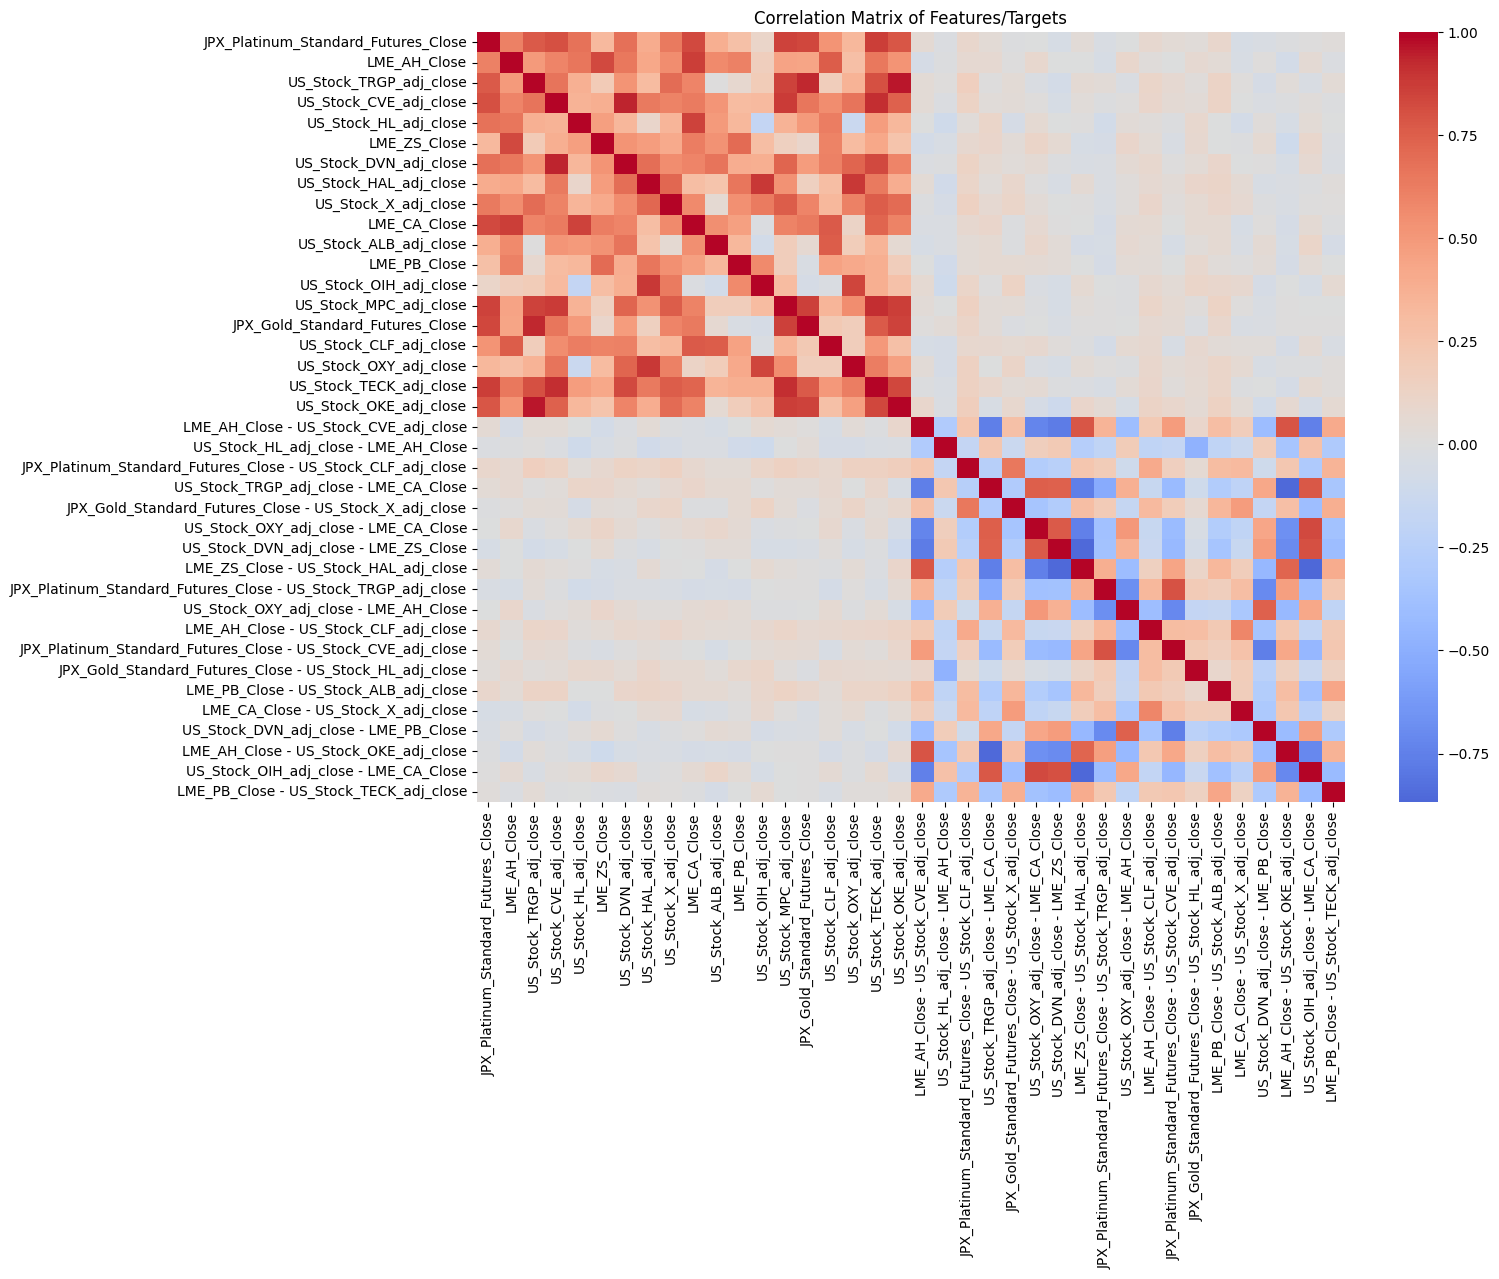


Number of highly correlated pairs (>|0.9|): 5

Highly correlated pairs (>|0.9|):
('US_Stock_CVE_adj_close', 'US_Stock_DVN_adj_close', np.float64(0.9396451364129675))
('US_Stock_CVE_adj_close', 'US_Stock_TECK_adj_close', np.float64(0.9125358937707267))
('US_Stock_MPC_adj_close', 'US_Stock_TECK_adj_close', np.float64(0.9168600057751445))
('JPX_Gold_Standard_Futures_Close', 'US_Stock_TRGP_adj_close', np.float64(0.9273687032907232))
('US_Stock_OKE_adj_close', 'US_Stock_TRGP_adj_close', np.float64(0.9566868641071329))


In [442]:
# Drop date_id 
corr_matrix = df_merged.drop(columns=['date_id'], errors='ignore').corr()

# Plot correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Features/Targets")
plt.show()

# Identify highly correlated pairs
threshold = 0.9
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 < col2 and abs(corr_matrix.loc[col1, col2]) > threshold
]

print(f"\nNumber of highly correlated pairs (>|{threshold}|): {len(high_corr_pairs)}")
if high_corr_pairs:
    print("\nHighly correlated pairs (>|0.9|):")
    for pair in high_corr_pairs:
        print(pair)
else:
    print("No extreme correlations found")



### Correlation Analysis Intepretation 

- We applied a **0.9 correlation threshold** to flag highly correlated pairs.  
- A total of **5 pairs** exceeded this threshold, meaning they may introduce multicollinearity risks if included together in models.

### Distribution of Features & Targets

We examined the distribution of each feature and target variable using histograms. These plots help identify potential outliers, skewness, and the general shape of the data, which informs the choice of preprocessing and modeling techniques.


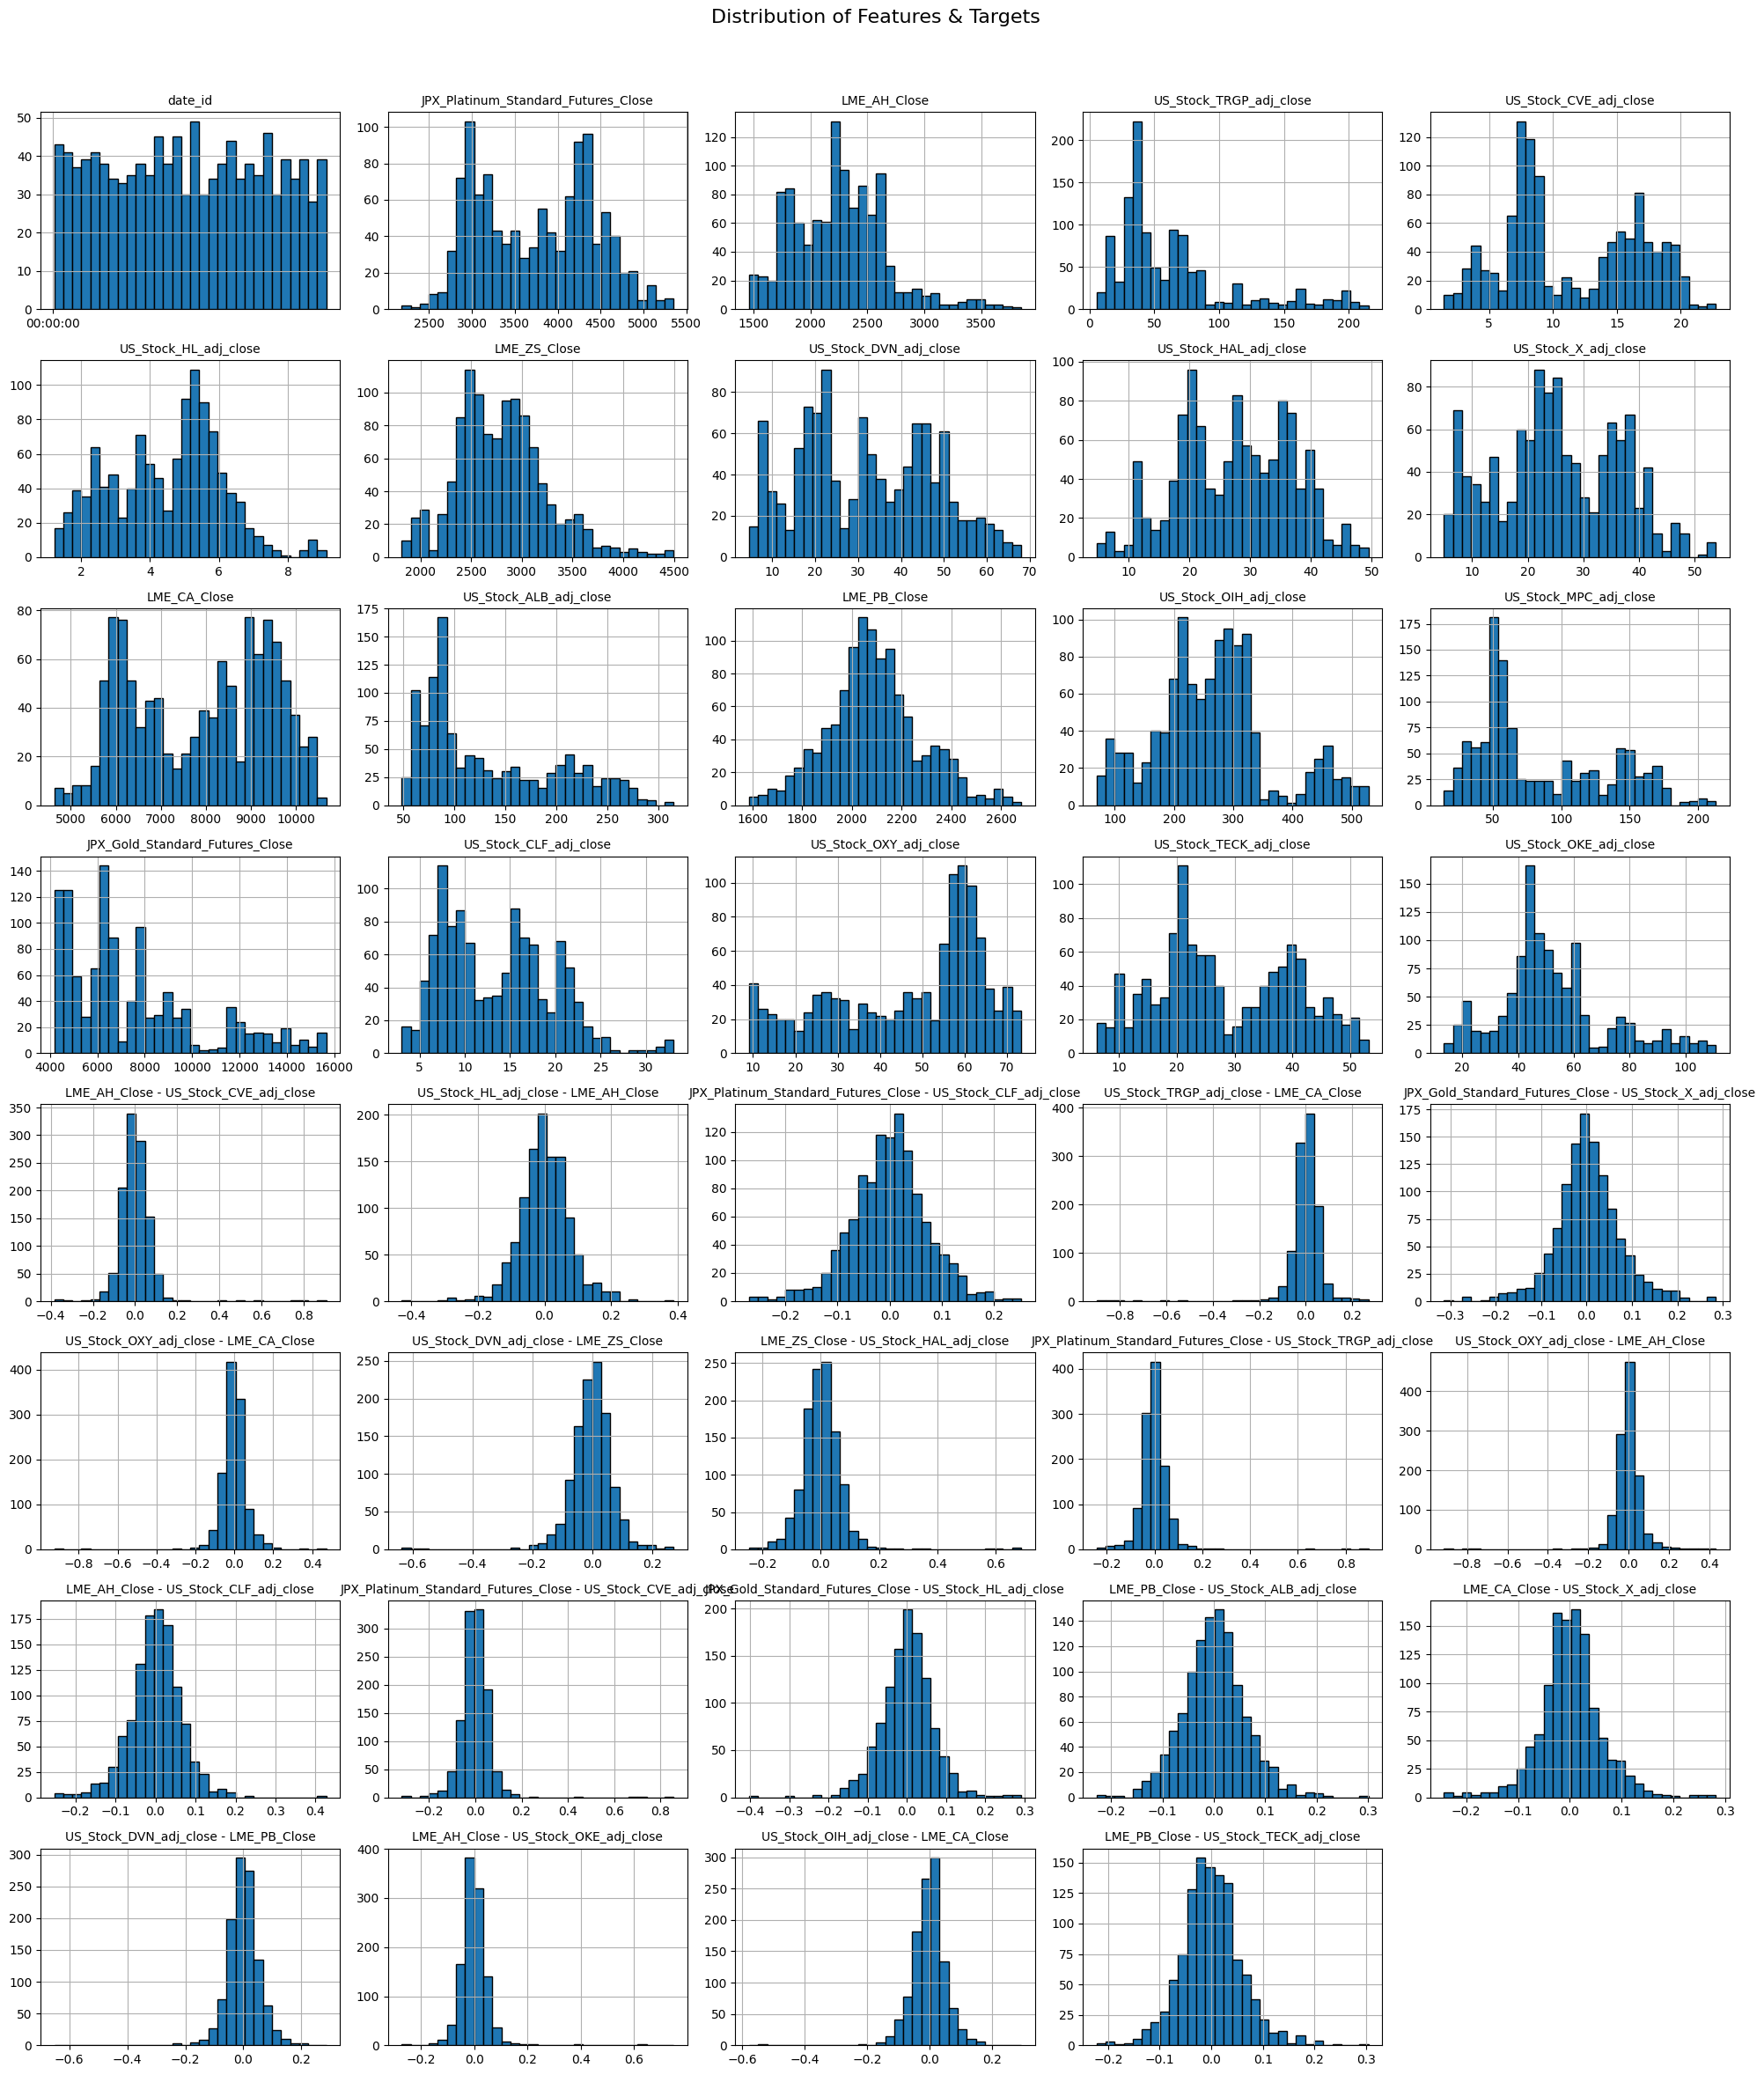

In [443]:
cols = 5
rows = int(np.ceil(len(df_merged.columns) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
axes = axes.flatten()  

for i, col in enumerate(df_merged.columns):
    df_merged[col].hist(bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove empty subplots (
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Features & Targets", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()




### Distribution of Features & Targets

The histograms above illustrate the distributions of our merged dataset’s features and targets.

 1. Stocks & Commodities
- Most of the raw stock and commodity prices for example `US_Stock_MPC_adj_close`, `US_Stock_AIB_adj_close`, `LME_ZS_Close`are right-skewed.  
- The distributions show clustering around typical trading ranges with long right tails, indicating occasional spikes.

2. Commodity Futures (Gold, Platinum, Copper, etc.)
- Features such as `JPX_Gold_Standard_Futures_Close`, `PX_Platinum_Standard_Futures_Close`, and `LME_CU_Close` display central clustering with heavier tails.  

3. Transformed Features
- Many of the derived or difference features are bell-shaped and symmetric.  

4. Outliers
- Certain features, especially `US_Stock_TRGP_adj_close`, `US_Stock_OKE_adj_close`, and `US_Stock_TECK_adj_close`, show **sharp spikes** at extreme values.  
- Similarly, Platinum Futures exhibit **heavy tails**, suggesting periods of unusual volatility or structural breaks in the market.  
- These outliers may influence model performance.
 
Our dataset combines skewed raw price distributions with nearly-normal return distributions. To improve model performance, we should consider applying transformations to raw prices and using returns directly as predictors.


### Boxplot of Features & Targets

The following boxplots display the distribution and spread of each feature/target, with a focus on detecting outliers.  

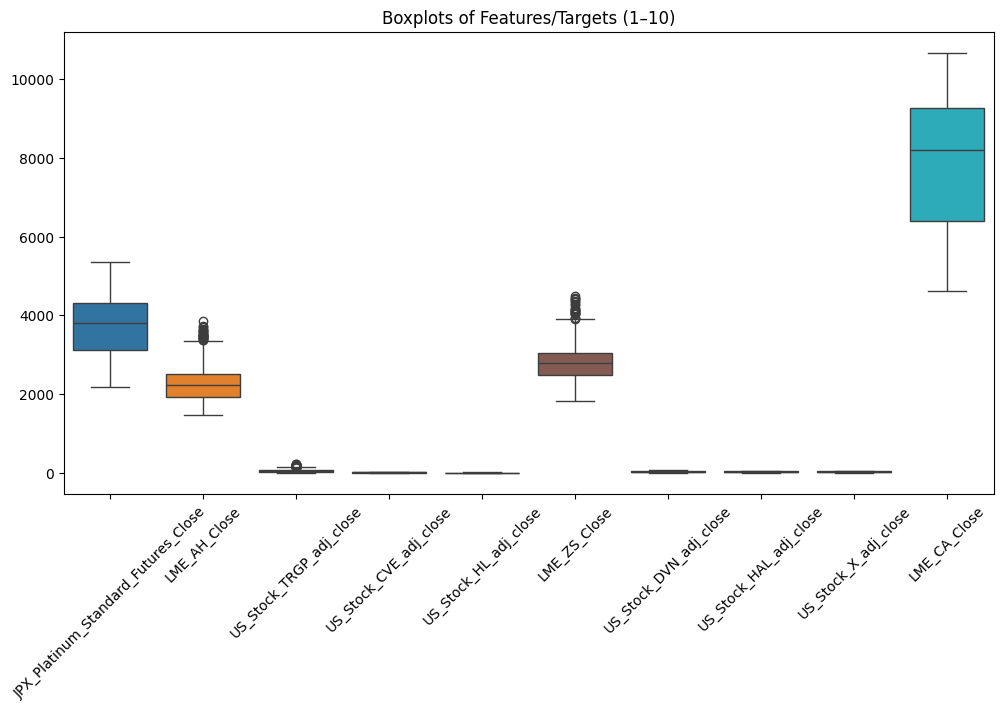

Summary statistics for 1–10:


,mean,std,min,25%,50%,75%,max
JPX_Platinum_Standard_Futures_Close,3751.263950,673.016523,2180.0000,3118.0000,3795.0000,4308.0000,5354.0000
LME_AH_Close,2250.170018,407.000850,1462.0000,1922.0000,2238.5000,2499.0000,3849.0000
US_Stock_TRGP_adj_close,63.308026,46.471441,5.2931,33.4008,44.3539,74.6012,215.2110
US_Stock_CVE_adj_close,11.485679,5.193157,1.4700,7.5284,9.2527,16.4410,22.7567
US_Stock_HL_adj_close,4.482388,1.591535,1.2223,3.1855,4.8264,5.5743,9.1126
LME_ZS_Close,2801.704801,449.062773,1815.5000,2479.5000,2780.5000,3054.0000,4498.5000
US_Stock_DVN_adj_close,32.009154,15.465173,4.5596,19.4409,31.3877,44.8714,68.0521
US_Stock_HAL_adj_close,27.526359,9.373842,4.6756,20.2403,27.9129,35.3391,49.5065
US_Stock_X_adj_close,25.332778,10.974356,4.9159,18.2155,24.6812,34.8297,53.8200
LME_CA_Close,7910.298441,1525.273223,4630.0000,6395.0000,8194.0000,9276.0000,10674.0000


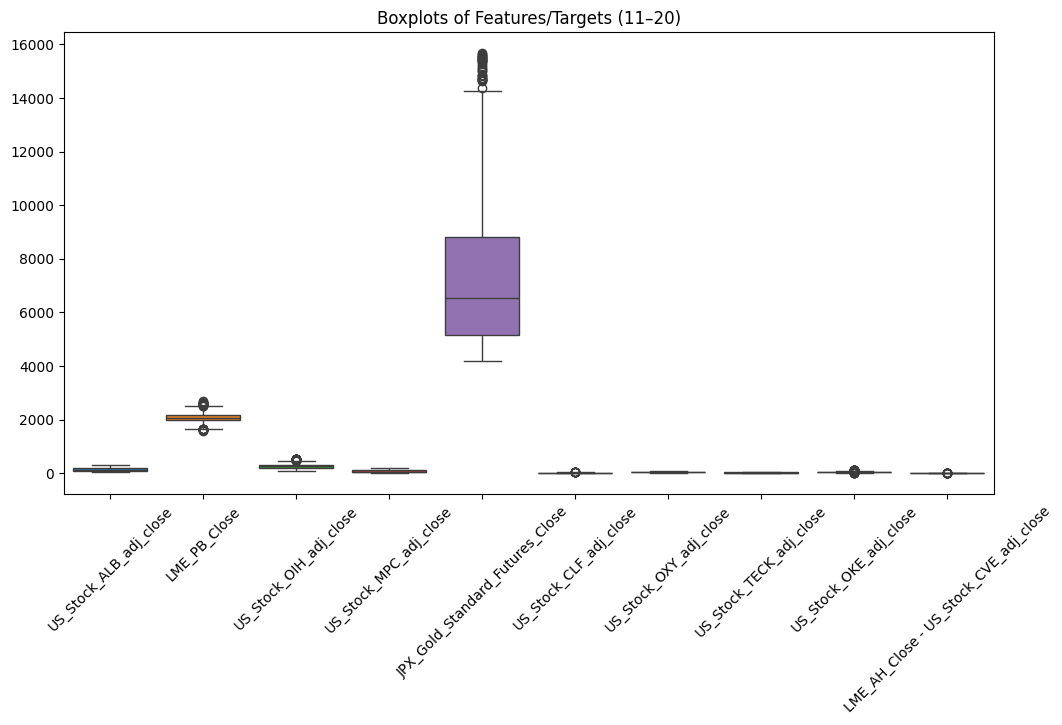

Summary statistics for 11–20:


,mean,std,min,25%,50%,75%,max
US_Stock_ALB_adj_close,133.994484,66.281536,48.150500,81.135300,107.069100,194.968900,315.363000
LME_PB_Close,2088.905031,187.894539,1585.500000,1978.500000,2078.000000,2190.000000,2681.000000
US_Stock_OIH_adj_close,265.752282,97.764886,69.238000,205.754100,266.283800,312.992200,528.301800
US_Stock_MPC_adj_close,84.634673,47.454774,14.071100,49.880000,61.470200,123.442100,213.358200
JPX_Gold_Standard_Futures_Close,7484.437555,2851.348336,4174.000000,5160.000000,6528.000000,8829.000000,15670.000000
US_Stock_CLF_adj_close,13.581528,5.991806,3.021500,8.257200,13.110000,17.700000,33.070000
US_Stock_OXY_adj_close,46.813464,17.911977,9.059500,31.238300,54.572800,60.784600,73.353800
US_Stock_TECK_adj_close,28.156113,11.778260,6.056100,19.719300,25.723500,38.593500,53.181900
US_Stock_OKE_adj_close,52.271068,19.490609,13.398000,42.225400,48.724800,60.322200,110.997300
LME_AH_Close - US_Stock_CVE_adj_close,0.001335,0.082039,-0.383897,-0.039239,-0.003687,0.034579,0.908524


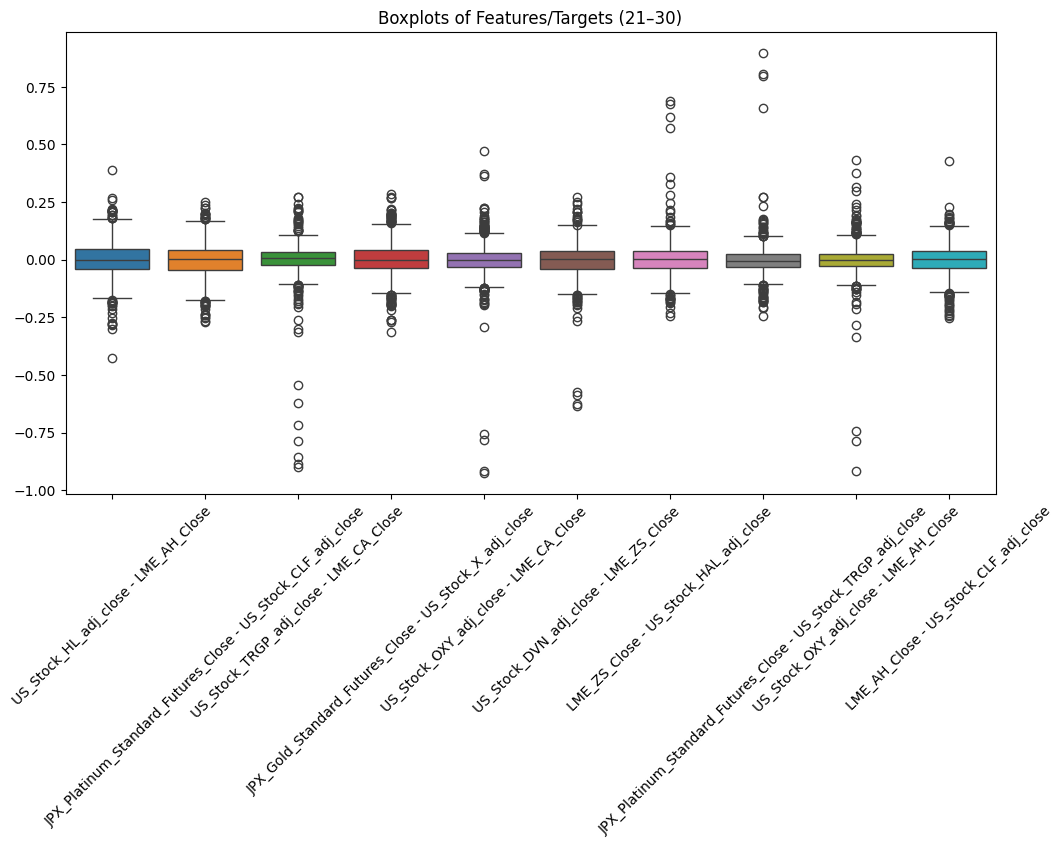

Summary statistics for 21–30:


,mean,std,min,25%,50%,75%,max
US_Stock_HL_adj_close - LME_AH_Close,0.001520,0.075508,-0.428705,-0.040944,-0.000551,0.046795,0.388126
JPX_Platinum_Standard_Futures_Close - US_Stock_CLF_adj_close,-0.001284,0.073311,-0.269028,-0.045778,0.000935,0.042098,0.251630
US_Stock_TRGP_adj_close - LME_CA_Close,-0.000199,0.080722,-0.901004,-0.023401,0.005047,0.032693,0.271100
JPX_Gold_Standard_Futures_Close - US_Stock_X_adj_close,0.003341,0.071717,-0.314347,-0.035380,-0.000003,0.041568,0.285212
US_Stock_OXY_adj_close - LME_CA_Close,-0.002367,0.077871,-0.925517,-0.031970,-0.000355,0.027468,0.472875
US_Stock_DVN_adj_close - LME_ZS_Close,-0.002605,0.071391,-0.636494,-0.038386,0.001040,0.036826,0.272070
LME_ZS_Close - US_Stock_HAL_adj_close,0.002696,0.071741,-0.245386,-0.035767,0.001540,0.037222,0.687439
JPX_Platinum_Standard_Futures_Close - US_Stock_TRGP_adj_close,-0.000637,0.069001,-0.242821,-0.029814,-0.004476,0.022406,0.896104
US_Stock_OXY_adj_close - LME_AH_Close,-0.002344,0.069967,-0.915148,-0.029445,-0.001593,0.025324,0.433969
LME_AH_Close - US_Stock_CLF_adj_close,0.000381,0.064264,-0.252891,-0.034650,0.000999,0.038274,0.426956


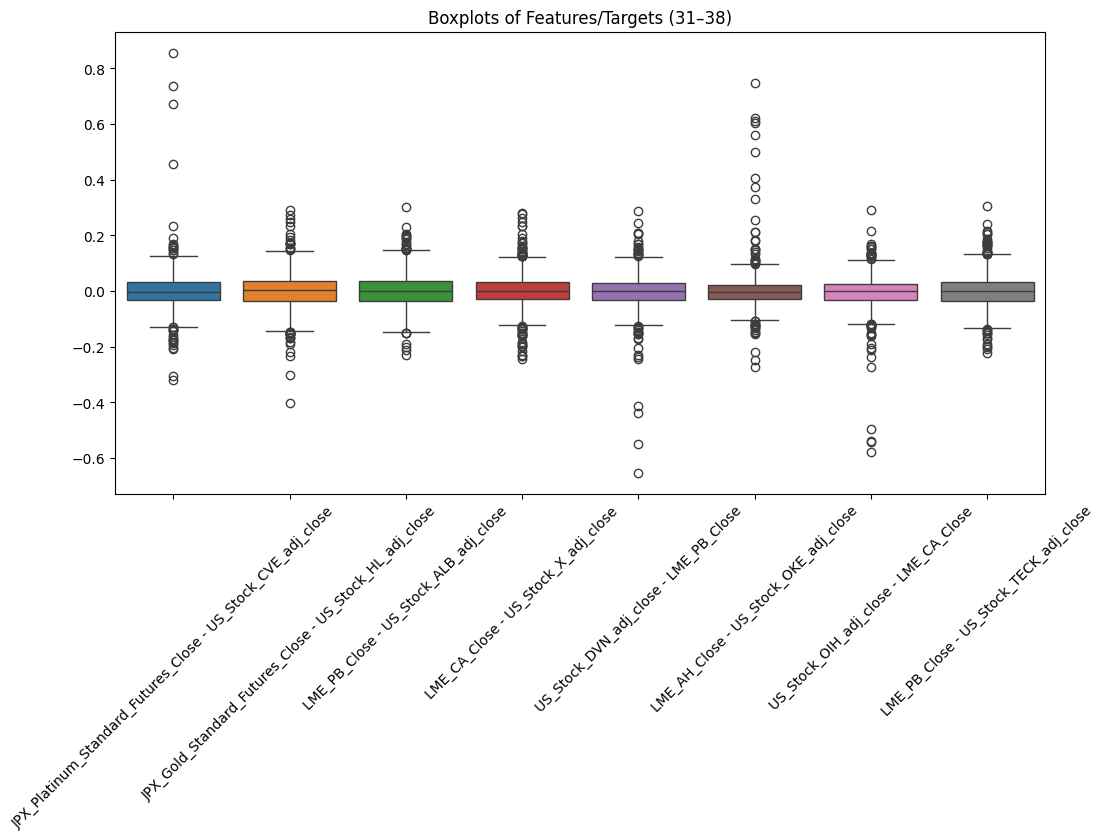

Summary statistics for 31–38:


,mean,std,min,25%,50%,75%,max
JPX_Platinum_Standard_Futures_Close - US_Stock_CVE_adj_close,0.000296,0.067914,-0.318051,-0.032946,-1.896127e-03,0.031517,0.857056
JPX_Gold_Standard_Futures_Close - US_Stock_HL_adj_close,0.000402,0.064195,-0.402551,-0.035506,3.486558e-03,0.037683,0.291133
LME_PB_Close - US_Stock_ALB_adj_close,0.001384,0.061189,-0.228545,-0.037132,7.941642e-04,0.036191,0.300915
LME_CA_Close - US_Stock_X_adj_close,0.001682,0.060549,-0.243076,-0.030282,1.146414e-03,0.031574,0.282071
US_Stock_DVN_adj_close - LME_PB_Close,-0.001546,0.062450,-0.652450,-0.031741,-1.469545e-03,0.029379,0.286121
LME_AH_Close - US_Stock_OKE_adj_close,0.000579,0.066421,-0.273195,-0.028055,-5.163731e-03,0.022188,0.748453
US_Stock_OIH_adj_close - LME_CA_Close,-0.004001,0.060948,-0.578169,-0.031255,3.318124e-07,0.026439,0.292677
LME_PB_Close - US_Stock_TECK_adj_close,0.000355,0.059084,-0.222629,-0.034162,4.676663e-04,0.033159,0.305034


In [444]:
numeric_cols = df_merged.drop(columns=['date_id'], errors='ignore').select_dtypes(include=np.number).columns

chunk_size = 10
for i in range(0, len(numeric_cols), chunk_size):
    cols = numeric_cols[i:i+chunk_size]
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df_merged[cols], orient="v")
    plt.xticks(rotation=45)
    plt.title(f"Boxplots of Features/Targets ({i+1}–{i+len(cols)})")
    plt.show()
    
    print(f"Summary statistics for {i+1}–{i+len(cols)}:")
    display(df_merged[cols].describe().T[['mean','std','min','25%','50%','75%','max']])


### Interpretation of Summary Statistics

Features 1–10
- US_Stock_MPC_adj_close, ALB, TRGP show high means with wide standard deviations, indicating strong volatility and wide trading ranges. For example, highlighting potential outliers.  
- HL (Hecla Mining) has a very low price scale, much less volatile than others, which may skew multi-feature models unless standardized.  
- LME_ZS_Close and LME_AH_Close (metals futures) have very high absolute values.  
- DVN, TECK, CLF (energy and mining stocks) have smaller ranges but still significant standard deviations, showing moderate volatility.  

This group mixes stocks and metals on different scales. Standardization will be required. Several features (ALB, MPC, TRGP) exhibit strong volatility and potential outliers.

Features 11–20
- CVE, OKE, OXY, HAL, OIH (oil & gas stocks) show typical ranges for energy sector equities, with volatility reflected in standard deviations 30–40% of their mean.  
- JPX_Gold and JPX_Platinum futures exhibit extremely high values, with long upper tails.  
- LME_CA_Close has mean 7,910 with wide variation, consistent with global copper cycles.  
- LME_AH_Close – CVE represents a difference/interaction feature, with a very small mean near 0 and small standard deviation, showing that it oscillates around equilibrium.  

 Energy stocks are volatile but range-bounded. Precious metals futures are much higher in scale, with long right tails. Derived features hover close to zero and act more like relative change indicators.

Features 21–30
- These are mostly interaction features.  
- Means are very close to 0, with small standard deviations.  
- The wide min–max ranges suggest that extreme deviations occur but are rare.  
- Outliers appear in OXY–LME_CA and DVN–LME_ZS with extreme negative values, indicating sharp divergences during certain market periods.  

Interaction features capture co-movement between commodities and equities. Most of the time they’re stable around 0, but rare shocks create large outliers — useful signals for stress periods.

Features 31–38
- interaction features, all with means very close to 0.  
- Standard deviations are smaller, reflecting tight clustering.  
- Maximums (0.7–0.8) and minimums (−0.3 to −0.6) suggest occasional significant deviations, but overall stability.  

These features serve as relative spread measures. They’re informative in highlighting when equity and commodity markets decouple, but their small scale compared to raw features means they must be standardized for fair comparison in modeling.  


#### Target Trends Over Time

Here, we plot the time-series trends of the first four target variables.  
This helps us visually inspect:

1. Overall trend 
2. Volatility 
3. Seasonality/patterns 
4. Outliers

These plots provide an early understanding of how targets evolve over time.

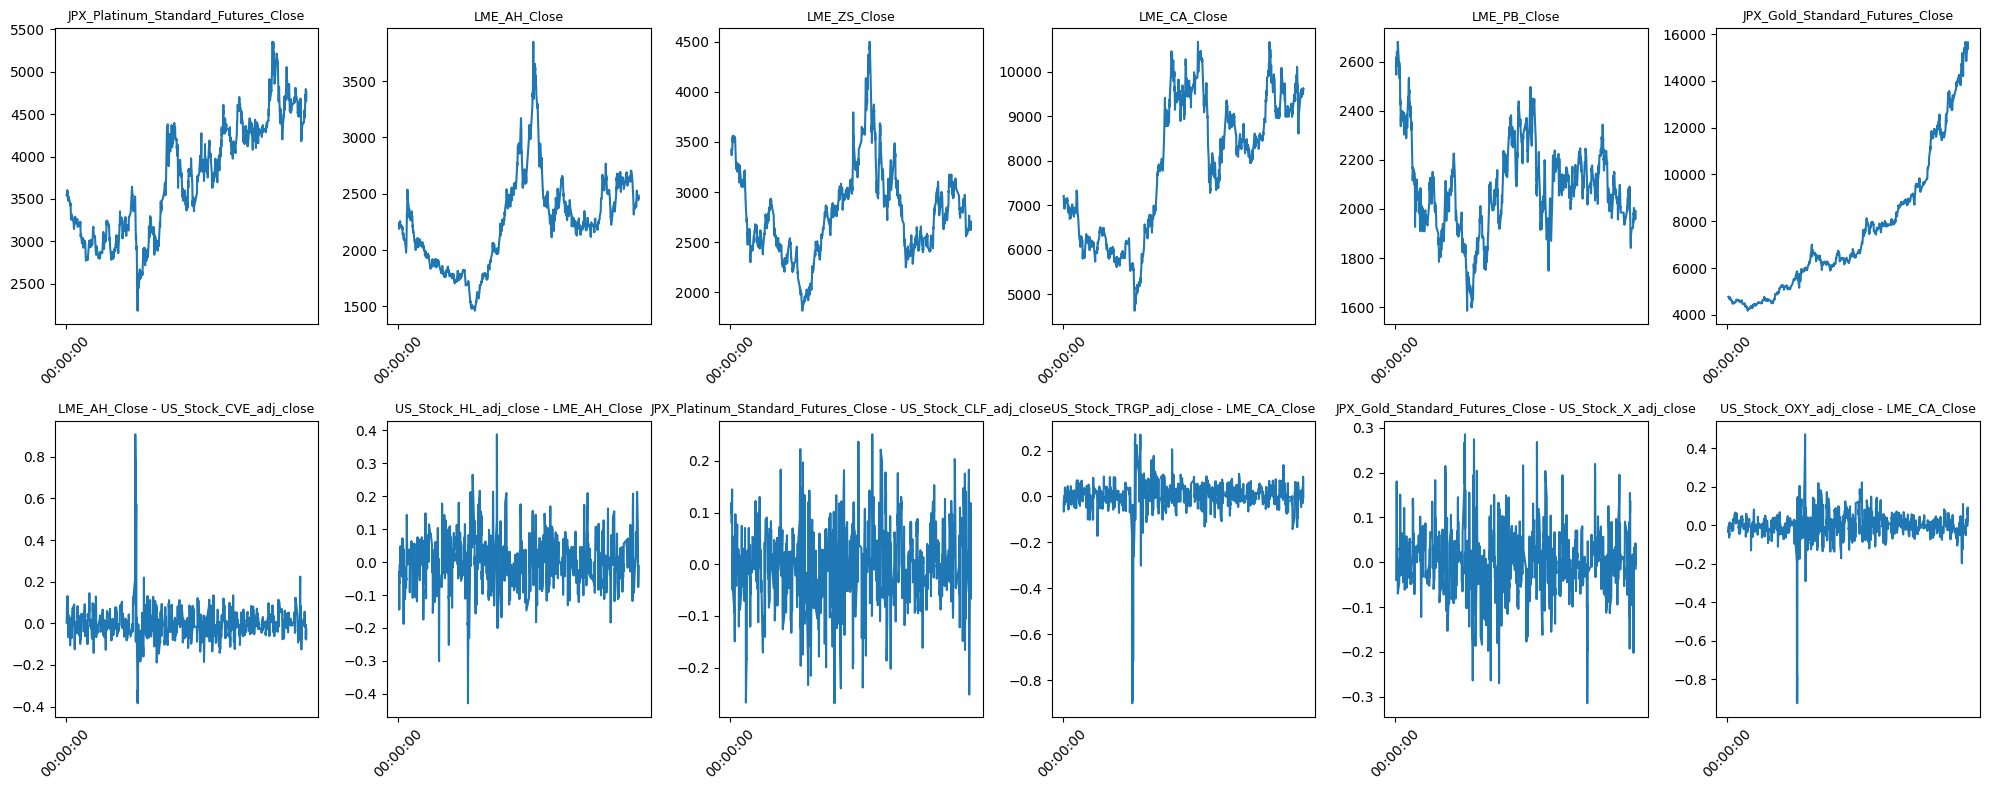

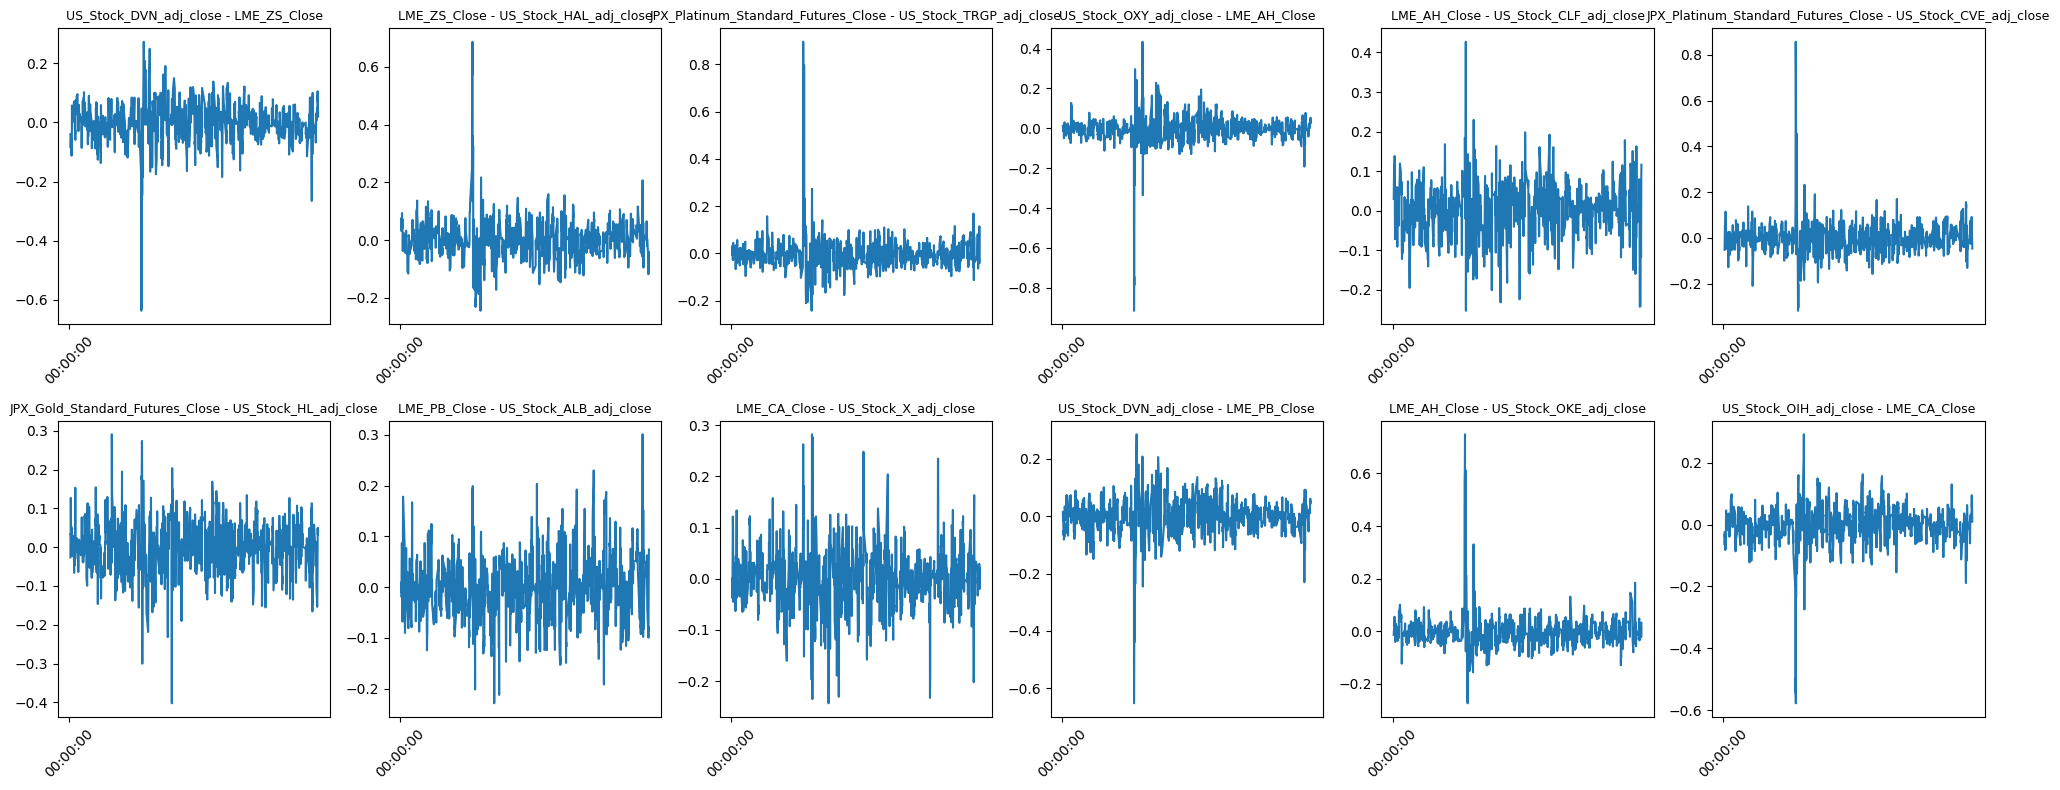

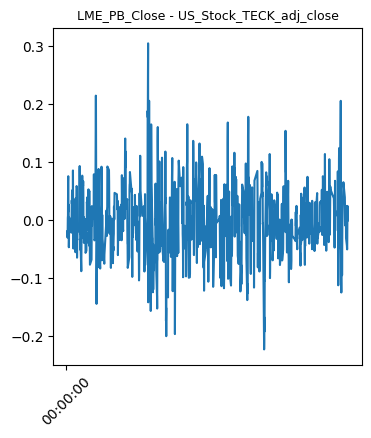

In [445]:
# Plot all target columns 
target_cols = [col for col in df_merged.columns if "Close" in col or "target" in col]

cols_per_plot = 6  
rows = 2           
plots_per_page = cols_per_plot * rows

for start in range(0, len(target_cols), plots_per_page):
    subset = target_cols[start:start+plots_per_page]
    plt.figure(figsize=(20, 8))
    for i, col in enumerate(subset, 1):
        plt.subplot(rows, cols_per_plot, i)
        plt.plot(df_merged['date_id'], df_merged[col])
        plt.title(f"{col}", fontsize=9)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Interpretation of Time-Series Trends of Features & Targets

 Commodity Features
- **LME_ZS_Close & LME_PB_Close:**  
  - Show **long-term cycles** with smooth rises and falls.  
  - Reflect supply-demand fundamentals in global commodity markets.  

- **JPX Gold Standard Futures Close:**  
  - Clear **upward trend** with periodic corrections.  
  - Acts as a **safe-haven asset**; demand rises during global uncertainty.  

- **JPX Platinum Standard Futures Close:**  
  - Upward bias but **more jagged corrections** than gold.  
  - Reflects **industrial demand cycles** in addition to investor behavior.  

Commodities behave like tides — moving steadily with global cycles. Gold and platinum climb slowly but surely, while base metals swing in waves.


 Stock Features (MPC, TECK, CVE, OKE, TRGP, etc.)
- **MPC & TECK:**  
  - Strongly **correlated**; sharp peaks and dips.  
  - Sensitive to **event-driven shocks** 

- **CVE & DVN:**  
  - Move almost **identically (>0.93 correlation)**.  
  - Represent **energy sector behavior**, showing mirrored shocks.  

- **OKE & TRGP:**  
  - Also **highly correlated (>0.95)**.  
  - Volatile, suggesting **infrastructure-related market risks**.  

Stocks are jittery, event-driven, and often moving in clusters. Energy-related stocks mirror each other, so not all are needed in modeling.

 Derived Features (Commodity − Stock Differences)
- Typically **centered around zero**.  
- Outliers represent moments when commodities and stocks decouple  
- Highlight **relative shifts**  

These act like “market gap monitors” — usually calm, but when they spike, it means stock and commodity markets are disagreeing.


Targets (target_0 … target_415)
- Mostly **noisy fluctuations around zero**.  
- Occasional **spikes** mark major events .  
- Some targets swing more strongly, indicating **event sensitivity**.  

Targets are like event detectors — mostly quiet, but they flare up during global shocks. Models will need smoothing/transformations to extract meaningful patterns.
